In [125]:
try:
    import IPython
except:
    %pip install IPython
    import IPython 

from IPython.display import display, IFrame, HTML
HTML("""<link rel="stylesheet" type="text/css" href="src/css/notebook.css">""")

#  Transforming John Ruskin Collection Data to Linked Art 

This notebook transforms collections data to a Linked Art representation for artworks by John Ruskin. The data origin collections data published in various formats by museums and galleries. 

- CSV
 - National Gallery of Art (NGA), Washington, USA
 - Cleveland Museum of Art, USA
- JSON
 - The Tate Museum, UK
 - Harvard Museum, USA 
 - Rijksmuseum, Netherlands
- HTML 
 - Ashmolean Museum, UK
 


## Transformation Process
The transformation process common to all data sources:
- read collection data into Python dictionary
- create a mapping between entities in the Python dictionary and entities in the Linked Art data model
- use the mapping together with `createObjDesc()`, `cromulent` Python library, and custom coding in the `createObjProp()` function, to create a Linked Art JSON-LD representation
- write to file

In [31]:
# output directory for files created
outputdir = "./data/ruskin/output/json/"

images = {}

## National Gallery of Art (NGA), Washington, United States

The collection data exists into two files:
- CSV data file containing artwork description  [data file](./data/nga/input/nga_ruskin.csv)
- CSV data file containing detailed digital image information for artworks https://raw.githubusercontent.com/NationalGalleryOfArt/opendata/main/data/published_images.csv


 #### Further Reading 
 
 - National Gallery of Art https://www.nga.gov/
 - NGA GitHub https://github.com/NationalGalleryOfArt

### Load NGA Collection Data into DataFrame

In [34]:
try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd
    
fileNGA = 'data/nga/input/nga_ruskin.csv'

dataFrameNGA = pd.read_csv(fileNGA)
dataFrameNGA.head()

,objectid,accessioned,accessionnum,locationid,title,displaydate,beginyear,endyear,visualbrowsertimespan,medium,...,visualbrowserclassification,parentid,isvirtual,departmentabbr,portfolio,series,volume,watermarks,lastdetectedmodification,customprinturl
0,70238,1,1987.73.2,NaN,Tower of the Cathedral at Sens,c. 1845,1845,1845,1826 to 1850,"pen and brown ink, brush and black ink, black ...",...,drawing,NaN,0,CG-E,NaN,NaN,NaN,NaN,2019-10-28 22:01:34.883-04,NaN
1,70367,1,1988.20.38,NaN,Tree Study,mid-1850s,1845,1855,1826 to 1850,pen and black ink with blue-gray and gray wash...,...,drawing,NaN,0,CG-E,NaN,NaN,NaN,NaN,2020-04-10 22:01:40.093-04,NaN
2,72870,1,1991.88.1,NaN,The Garden of San Miniato near Florence,1845,1845,1845,1826 to 1850,"watercolor and pen and black ink, heightened w...",...,drawing,NaN,0,CG-E,NaN,NaN,NaN,NaN,2019-10-28 22:01:34.883-04,NaN
3,76140,1,1995.52.158,NaN,"Ornamental Study with Acanthus Motif for ""The ...",1849,1849,1849,1826 to 1850,pen and brown ink with watercolor and graphite...,...,drawing,NaN,0,CG-E,NaN,NaN,NaN,NaN,2019-10-28 22:01:34.883-04,NaN


### Load NGA Digital Image File into DataFrame

The data file containing detailed digital image data is loaded into a pandas dataframe `dataFrameNGAImages`

In [35]:
fileNGAimages = "https://raw.githubusercontent.com/NationalGalleryOfArt/opendata/main/data/published_images.csv"
dataFrameNGAImages = pd.read_csv(fileNGAimages)
dataFrameNGAImages.head()

,uuid,iiifurl,iiifthumburl,viewtype,sequence,width,height,maxpixels,created,modified,depictstmsobjectid,assistivetext
0,00004dec-8300-4487-8d89-562d0126b6a1,https://api.nga.gov/iiif/00004dec-8300-4487-8d...,https://api.nga.gov/iiif/00004dec-8300-4487-8d...,primary,0.0,2623,4000,640.0,2010-09-07 15:08:48-04,2022-04-21 12:57:43.657-04,11975,NaN
1,00007f61-4922-417b-8f27-893ea328206c,https://api.nga.gov/iiif/00007f61-4922-417b-8f...,https://api.nga.gov/iiif/00007f61-4922-417b-8f...,primary,0.0,3365,4332,NaN,2013-07-05 15:41:08-04,2021-07-07 10:26:29-04,17387,NaN
2,0000bd8c-39de-4453-b55d-5e28a9beed38,https://api.nga.gov/iiif/0000bd8c-39de-4453-b5...,https://api.nga.gov/iiif/0000bd8c-39de-4453-b5...,primary,0.0,3500,4688,NaN,2013-08-05 14:31:59-04,2021-07-07 10:34:01-04,19245,NaN
3,0000e5a4-7d32-4c2a-97c6-a6b571c9fd71,https://api.nga.gov/iiif/0000e5a4-7d32-4c2a-97...,https://api.nga.gov/iiif/0000e5a4-7d32-4c2a-97...,primary,0.0,2252,3000,NaN,2013-03-18 14:39:55-04,2021-08-31 10:29:14-04,153987,NaN
4,0001668a-dd1c-48e8-9267-b6d1697d43c8,https://api.nga.gov/iiif/0001668a-dd1c-48e8-92...,https://api.nga.gov/iiif/0001668a-dd1c-48e8-92...,primary,0.0,3446,4448,NaN,2014-01-02 14:50:50-05,2021-07-07 11:09:58-04,23830,NaN


### Remove Byte Order Marks and Define Data Mapping

Remove Byte Order Marks and create Python dictionary containing data mapping for each input file.

In [36]:


# remove BOM

removeBOM = open(fileNGA, mode='r', encoding='utf-8-sig').read()
open(fileNGA, mode='w', encoding='utf-8').write(removeBOM)


# data mapping between Linked Art data model and NGA data entities
mapp =  {
    "id":"objectid",
  "accession_number":"accessionnum",
    "accession_date": "",
    "classification" : "classification",
    "title": "title",
    "alt_title": "",
    "notes": "",
    "date_created":"displaydate",
    "date_created_earliest": "beginyear",
    "date_created_latest": "endyear",
    "created_period":"",
    "created_dynasty":"",
    "created_inscriptions":"",
    "created_notes": "",
    "created_provenance" : "",
    "creator":"attribution",
    "physical_medium": "medium",
    "physical_style": "",
    "physical_technique": "",
    "physical_description": "",
    "physical_dimensions": "dimensions",
    "created_provenance": "" ,
    "credit_line": "creditline",
    "collection" : "departmentabbr",
    "current_status" : "",
    "current_owner" : "",
    "homepage": ""
}

# display transposed dataframe of data mapping
display(pd.DataFrame(mapp, index=[0]).T)

,0
id,objectid
accession_number,accessionnum
accession_date,
classification,classification
title,title
alt_title,
notes,
date_created,displaydate
date_created_earliest,beginyear
date_created_latest,endyear


### Transform to JSON-LD 

This next step uses the following to transform the collections data to Linked Art JSON-LD
- the data mapping
- custom coding in createObjProp()
- cromulant Python library
- custom coding in la including createObjDescription()

The URLs for the artwork digital images are in a separate file. With custom coding in `createObjProp()` the rows in the two collection data files are mapped to extract the digital image url.

<pre>
    matchImages = dataFrameNGAImages.query('depictstmsobjectid == ' + objProp["id"] )
    objProp["image_url"] = matchImages["iiifurl"].iloc[0]  + "/full/!500,500/0/default.jpg"
</pre>


Additional custom code creates a web page URL for the artwork:

<pre>
objProp["homepage"] = "https://www.nga.gov/collection/art-object-page." + id + ".html"   
</pre>

In [37]:
try:
    import cromulent 
except:
    %pip install cromulent
    import cromulent
    
from cromulent.model import factory
from lib import linkedart as la

import csv

#  baseURI for JSON-LD document
baseURI = "https://www.nga.gov/collection/"
fileNGA = 'data/nga/input/nga_ruskin.csv'

# list to hold file names for use with jsonld visualisation dropdown
selectOptions = []
selectOptions = [('Please select an artwork', '')]

def createObjProp(obj,mapp):
    objProp = {}
    csv_keys = list(obj.keys())
    for key in csv_keys:
        for prop in mapp:
            if key == mapp[prop]:
                
                # custom code to populate the creator property
                if prop == "creator":
                    objProp[prop] = [{"id": baseURI +"creatorid/" + obj[mapp["id"]] ,"name": obj[key],"role":"Artist"}]
                else:
                    objProp[prop] = obj[key]
    
    # custom code to populate the image_url property
    matchImages = dataFrameNGAImages.query('depictstmsobjectid == ' + objProp["id"] )
    objProp["image_url"] = matchImages["iiifurl"].iloc[0]  + "/full/!500,500/0/default.jpg"
   
    # custom code to define the homepage properity
    objProp["homepage"] = "https://www.nga.gov/collection/art-object-page." + objProp["id"] + ".html"
        
    return objProp   

    
allObjects = csv.DictReader(open(fileNGA, mode='r',encoding='utf-8'))

for obj in allObjects:
    # create object property dictionary
    objProp = createObjProp(obj,mapp)
    
    id = objProp["id"]
    filename = id + ".json"

    # create obj description
    objLA = la.createObjDesc(objProp,la.objTypes,baseURI + id)

    # write to file 
   
    text_file = open(outputdir + filename, "wt")
    n = text_file.write(factory.toString(objLA, compact=False))
    text_file.close()
    
    selectOptions.append( ( objProp["title"] + " (" + filename + ")" , filename))
    
    # display title and table for illustration
    display(objProp["title"])
    display(pd.DataFrame(objProp, index=[0]))
    

'Tower of the Cathedral at Sens'

,id,accession_number,title,date_created,date_created_earliest,date_created_latest,physical_medium,physical_dimensions,creator,credit_line,classification,collection,image_url,homepage
0,70238,1987.73.2,Tower of the Cathedral at Sens,c. 1845,1845,1845,"pen and brown ink, brush and black ink, black ...",sheet: 40.7 x 30.6 cm (16 x 12 1/16 in.),{'id': 'https://www.nga.gov/collection/creator...,Gift of William B. O'Neal,Drawing,CG-E,https://api.nga.gov/iiif/49a6128c-8d5a-4b00-be...,https://www.nga.gov/collection/art-object-page...


'Tree Study'

,id,accession_number,title,date_created,date_created_earliest,date_created_latest,physical_medium,physical_dimensions,creator,credit_line,classification,collection,image_url,homepage
0,70367,1988.20.38,Tree Study,mid-1850s,1845,1855,pen and black ink with blue-gray and gray wash...,overall: 28.4 x 38.1 cm (11 3/16 x 15 in.),{'id': 'https://www.nga.gov/collection/creator...,Gift of John Nichols Estabrook and Dorothy Coo...,Drawing,CG-E,https://api.nga.gov/iiif/9310c903-7099-4138-b3...,https://www.nga.gov/collection/art-object-page...


'The Garden of San Miniato near Florence'

,id,accession_number,title,date_created,date_created_earliest,date_created_latest,physical_medium,physical_dimensions,creator,credit_line,classification,collection,image_url,homepage
0,72870,1991.88.1,The Garden of San Miniato near Florence,1845,1845,1845,"watercolor and pen and black ink, heightened w...",Overall: 34.2 x 49.2 cm (13 7/16 x 19 3/8 in.)...,{'id': 'https://www.nga.gov/collection/creator...,Patrons' Permanent Fund,Drawing,CG-E,https://api.nga.gov/iiif/f6ef48d3-3512-4f46-ac...,https://www.nga.gov/collection/art-object-page...


'Ornamental Study with Acanthus Motif for "The Stones of Venice"'

,id,accession_number,title,date_created,date_created_earliest,date_created_latest,physical_medium,physical_dimensions,creator,credit_line,classification,collection,image_url,homepage
0,76140,1995.52.158,"Ornamental Study with Acanthus Motif for ""The ...",1849,1849,1849,pen and brown ink with watercolor and graphite...,overall: 20.1 x 16.6 cm (7 15/16 x 6 9/16 in.),{'id': 'https://www.nga.gov/collection/creator...,Gift of William B. O'Neal,Drawing,CG-E,https://api.nga.gov/iiif/bc567179-9c1e-4493-b7...,https://www.nga.gov/collection/art-object-page...


### Explore the Linked Art JSON-LD files

Select an artwork from the dropdown to view 
- the artwork image
- a visualisation of the Linked Art JSON-LD representation created above

In [38]:
try:
    import ipywidgets
except:
    %pip install ipywidgets
    import ipywidgets

from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image

import os

try:
    import json
except:
    %pip install json
    import json 
    
from IPython.core.display import Javascript        
    
def dropdown_eventhandler(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        code = _jscript.read() + "var file = '" + outputdir + change.new + "';var selector = '#visnga';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( outputdir + "/" + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artworknga').src = '" + image   +   "';"))
                else:
                    display(Javascript("document.getElementById('artworknga').src = '';"))
                    

selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ('Tower of the Cathedral at Sens (70238.json)', '70238.jso…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img style="height:500px" id="artworknga" src=""/></div>

<div id='visnga' style='height:100%;width:6000px'></div>

## Cleveland Museum of Art (CMA)

The Cleveland Museum of Art (CMA) has published its collection data in a GitHub Repository. 



### Works by John Ruskin in CMA Collection Data

There is a single artwork by John Ruskin in the Cleveland Museum of Art (CMA) collection data available.

The extract this record, the following method was used:
- download [collection data file](https://github.com/ClevelandMuseumArt/openaccess/blob/master/data.csv) from CMA's GitHub repository
- use [OpenRefine](https://openrefine.org/) to identify and extract relevant records
 - create a text facet for the Creator field to 
 - identify artworks by John Ruskin using facet
 - export record 
 - save CSV file  [CMA Ruskin data file](./data/cma/input/ruskin.csv) 


#### Further Reading 
- Cleveland Museum of Art http://www.clevelandart.org/
- CMA GitHub open data repository https://github.com/ClevelandMuseumArt/openaccess
- CSV data file https://github.com/ClevelandMuseumArt/openaccess/blob/master/data.csv
- [CMA Ruskin data file](./data/cma/input/ruskin.csv) 
- [OpenRefine](https://openrefine.org/) 


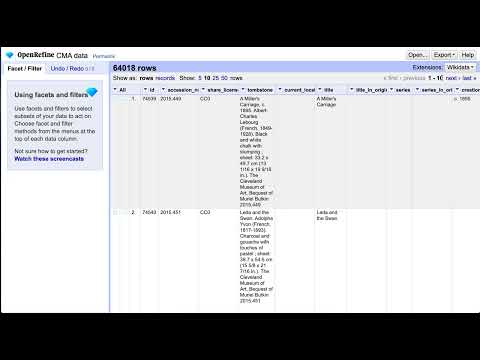

In [39]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - Using  OpenRefine to extract Ruskin record from CMA data</h4>"))

YouTubeVideo('npVMbybZ3p8', width=1024, height=576)

### Collection Data for John Ruskin

The following table shows the relevant collection input data for illustration, and a digital image of the artwork is shown beneath.


In [40]:
#  baseURI for JSON-LD document
baseURI = "https://clevelandart.org/art/"
file = './data/cma/input/ruskin.csv'
#mpg = pd.read_csv(file)
#mpg.head()

display(pd.DataFrame(pd.read_csv(file), index=[0]).T)

,0
id,154494
accession_number,1989.14
share_license_status,CC0
tombstone,"Budding Sycamore, c. 1876. John Ruskin (Britis..."
current_location,NaN
title,Budding Sycamore
title_in_original_language,NaN
series,NaN
series_in_original_language,NaN
creation_date,c. 1876


Budding Sycamore


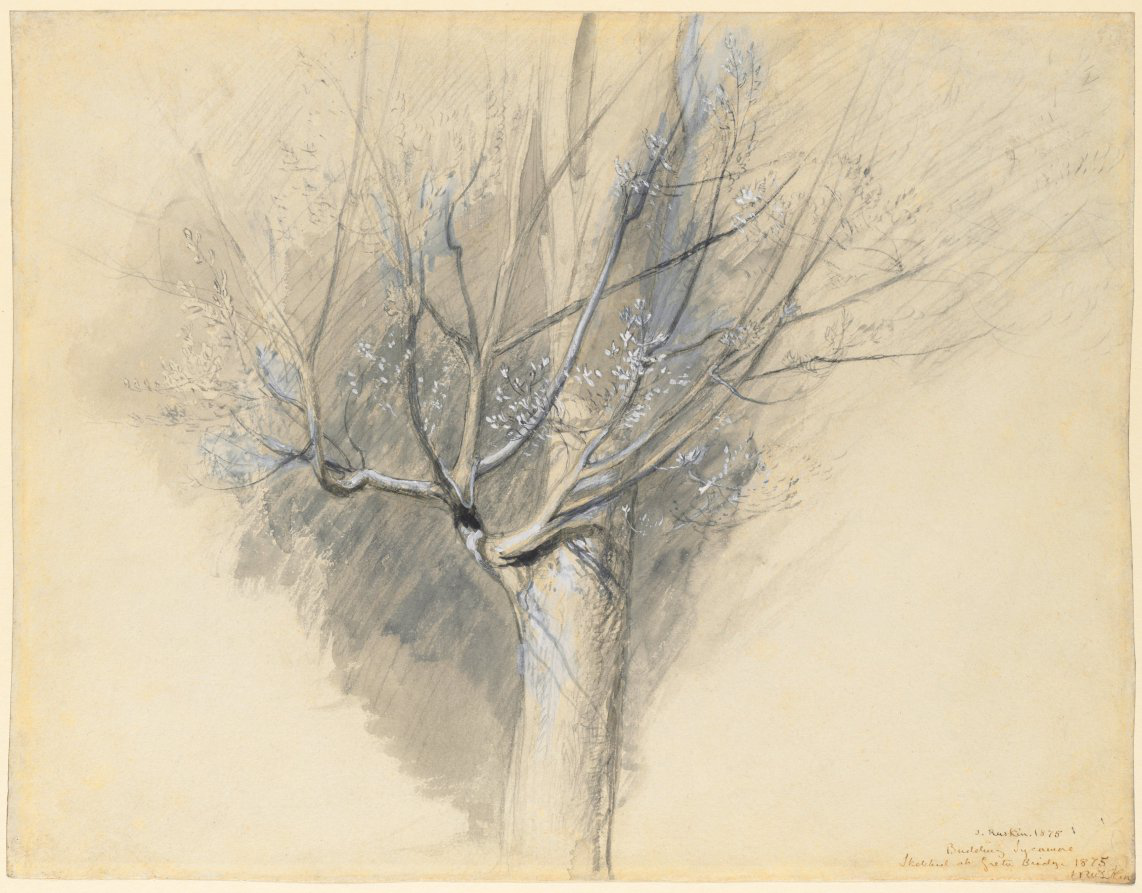

In [41]:
try:
    from PIL import Image
except:
    %pip install Pillow
    from PIL import Image
    
import requests

url = "https://openaccess-cdn.clevelandart.org/1989.14/1989.14_web.jpg"
image = Image.open(requests.get(url, stream=True).raw)

print("Budding Sycamore")
image

### Remove Byte Order Marks and Define Data Mapping

`mapp` holds the data mapping between entities in the Linked Art data model and the CMA data model

In [42]:

#remove BOM
s = open(file, mode='r', encoding='utf-8-sig').read()
open(file, mode='w', encoding='utf-8').write(s)

mapp =  {
    "id":"id",
    "accession_number":"accession_number",
    "accession_date": "",
    "classification" : "type",
    "title": "title",
    "alt_title": "title_in_original_language",
    "notes": "tombstone",
    "date_created":"creation_date",
    "date_created_earliest": "creation_date_earliest",
    "date_created_latest": "creation_date_latest",
    "created_period":"culture",
    "created_dynasty":"",
    "created_inscriptions":"inscriptions",
    "created_notes": "fun_fact",
    "creator":"creator",
    "physical_medium": "Medium",
    "physical_style": "",
    "physical_technique": "technique",
    "physical_description": "",
    "physical_dimensions": "measurements",
    "created_provenance": "provenance" ,
    "credit_line": "creditline",
    "collection" : "department",
    "current_status" : "current_location",
    "current_owner": "",
    "creator": {"name": "John Ruskin"},
    "homepage": "url"
    
    
}

# display transposed dataframe of data mapping
display(pd.DataFrame(mapp, index=[0]).T)

,0
id,id
accession_number,accession_number
accession_date,
classification,type
title,title
alt_title,title_in_original_language
notes,tombstone
date_created,creation_date
date_created_earliest,creation_date_earliest
date_created_latest,creation_date_latest


### Transform Collections Data to Linked Art JSON-LD

This next step uses the following to transform the collections data to Linked Art JSON-LD

- the data mapping
- custom coding in createObjProp()
- `cromulant` Python library
- custom coding in `la` including createObjDescription()

In [43]:
file = './data/cma/input/ruskin.csv'

# open collection data input file 
allObjects = csv.DictReader(open(file, mode='r',encoding='utf-8'))

# iterate through row - only 1 in this case 
for obj in allObjects:
    
    # create object property dictionary
    objProp = createObjProp(obj,mapp)

    id = objProp["id"]
    object_uri = baseURI + id
    
    # define "image_url" property
    objProp["image_url"] = "https://clevelandart.org/art/" + id
    
    objProp["creator"] = [{"id": baseURI +"creatorid/JohnRuskin" ,"name": "John Ruskin","role":"Artist"}]
                    
    # create Linked Art representation using `la` and cromulent
    objLA = la.createObjDesc(objProp,la.objTypes,object_uri)
    
    # write Linked Art to file 
    text_file = open(outputdir + "/" + id + ".json", "wt")
    
    # use cromulent to write file 
    n = text_file.write(factory.toString(objLA, compact=False))
    
    text_file.close()
    
    display(pd.DataFrame(objProp, index=[0]).T)
    
    
# custom coding to create dictionary to be used to create Linked Art JSON-LD
def createObjProp(obj,mapp):
    objProp = {}
    
    # iterate through keys in csv collection data input file
    csv_keys = list(obj.keys())
    for key in csv_keys:
        # iterate through the data mapping
        for prop in mapp:
            if key == mapp[prop]:
                
                if prop == "classification":
                    objProp[prop] = "Drawing"
                ## define custom mapping for the creator property
                else:
                    objProp[prop] = obj[key]
    return objProp 

,0
id,154494
accession_number,1989.14
notes,"Budding Sycamore, c. 1876. John Ruskin (Britis..."
current_status,
title,Budding Sycamore
alt_title,
date_created,c. 1876
date_created_earliest,1871
date_created_latest,1881
created_period,"England, 19th century"


In [44]:
with open('./src/js/visld.js', 'r') as _jscript:
        code = _jscript.read() + "var file = '" + outputdir +  "154494.json';var selector = '#viscma';visjsonld(file, selector); "
        display(Javascript(code))

<IPython.core.display.Javascript object>

<div id='viscma' style='height:100%;width:6000px'></div>

## Tate Museum

The Tate, is located in the UK and has three items by John Ruskin in its Collection data, published in its GitHub repository. The date are available in separate JSON files and in a CSV file. The exercise will use the [CSV file](https://github.com/tategallery/collection/blob/master/artwork_data.csv). 

- ruskin-an-olive-spray-and-two-leaf-outlines
 - [web page](https://www.tate.org.uk/art/artworks/ruskin-an-olive-spray-and-two-leaf-outlines-n02726)
 - [data file](https://raw.githubusercontent.com/tategallery/collection/master/artworks/n/027/n02726-13031.json)
- ruskin-the-north-west-angle-of-the-facade-of-st-marks-venice
 - [web page](https://www.tate.org.uk/art/artworks/ruskin-the-north-west-angle-of-the-facade-of-st-marks-venice-n02972) 
 - [data file](https://raw.githubusercontent.com/tategallery/collection/master/artworks/n/029/n02972-13032.json)  
- ruskin-view-of-bologna
 - [web page](https://www.tate.org.uk/art/artworks/ruskin-view-of-bologna-n03507) 
 - [data file](https://raw.githubusercontent.com/tategallery/collection/master/artworks/n/035/n03507-13033.json)  
 
 #### Further Reading 
 
-  [The Tate Collection GitHub repository](https://github.com/tategallery/collection)
- [The Tate Collection web page for artist John Ruskin](https://www.tate.org.uk/search?type=artwork&q=john+ruskin)
- [The Tate data file for artist John Ruskin](https://github.com/tategallery/collection/blob/master/artists/r/ruskin-john-465.json)
- [The Tate data file for artworks CSV file ](https://github.com/tategallery/collection/blob/master/artwork_data.csv)


### Collection Data for Ruskin

The collection data contained in the CSV file is extracted using OpenRefine in the same process as was used for the CMA data above. The resulting CSV file is shown below:

In [45]:
baseURI = "https://www.tate.org.uk/art/artworks/"
file = './data/tate/tate-artwork_data.csv'

mpg = pd.read_csv(file)
mpg.head()


,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,13031,N02726,"Ruskin, John",artist,465,An Olive Spray and Two Leaf Outlines,before 1877,"Graphite, watercolour and ink on paper",Presented by Sir Claude Phillips in memory of ...,1831.0,1910,support: 375 x 279 mm,375,279,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/N/N02/N...,http://www.tate.org.uk/art/artworks/ruskin-an-...
1,13032,N02972,"Ruskin, John",artist,465,The North-West Angle of the Facade of St Mark’...,date not known,Watercolour and graphite on paper,Presented by the Art Fund 1914,NaN,1914,support: 940 x 610 mm,940,610,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/N/N02/N...,http://www.tate.org.uk/art/artworks/ruskin-the...
2,13033,N03507,"Ruskin, John",artist,465,View of Bologna,c.1845–6,Ink and watercolour on paper,Purchased 1920,1845.0,1920,support: 343 x 489 mm,343,489,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/N/N03/N...,http://www.tate.org.uk/art/artworks/ruskin-vie...


### Data Mapping for The Tate

The `mapp` below shows the data mapping between entities in The Tate data model and Linked Art data model

In [46]:
mapp =  {
    "id":"id",
    "accession_number":"accession_number",
    "accession_date": "acquisitionYear",
    "classification" : "",
    "title": "title",
    "alt_title": "",
    "notes": "",
    "date_created":"dateText",
    "date_created_earliest": "year",
    "date_created_latest": "year",
    "created_period":"",
    "created_dynasty":"",
    "created_inscriptions":"inscription",
    "created_notes": "",
    "creator":"artist",
    "physical_medium": "medium",
    "physical_style": "",
    "physical_technique": "",
    "physical_description": "",
    "physical_dimensions": "dimensions",
    "created_provenance": "" ,
    "credit_line": "creditLine",
    "collection" : "Department",
    "current_status" : "",
    "current_owner": "Tate Museum",
    "image_url":"thumbnailUrl",
    "homepage" : "url"
}

# display transposed dataframe of data mapping
display(pd.DataFrame(mapp, index=[0]).T)

,0
id,id
accession_number,accession_number
accession_date,acquisitionYear
classification,
title,title
alt_title,
notes,
date_created,dateText
date_created_earliest,year
date_created_latest,year


### Transform Tate Collection Data to Linked Art 

This next step uses the following to transform the collections data to Linked Art JSON-LD

- the data mapping `mapp`
- custom coding in createObjProp()
- `cromulant` Python library
- custom coding in `la` including createObjDescription()

In [47]:
file = './data/tate/tate-artwork_data.csv'

#remove BOM
s = open(file, mode='r', encoding='utf-8-sig').read()
open(file, mode='w', encoding='utf-8').write(s)

selectOptions = []
selectOptions.append(("Please select an artwork", ""))


# open collection data input file 
allObjects = csv.DictReader(open(file, mode='r',encoding='utf-8'))

# iterate through row - only 1 in this case 
for obj in allObjects:
    
    # create object property dictionary
    objProp = createObjProp(obj,mapp)
    id = objProp["id"]
    object_uri = baseURI + id
    
    objProp["classification"] = "Painting"
    
    
    objProp["creator"] = [{"id": baseURI +"creatorid/" + obj["artistId"] ,"name": "John Ruskin","role":"Artist"}]
    
    # create Linked Art representation using `la` and cromulent
    objLA = la.createObjDesc(objProp,la.objTypes,object_uri)
    
    # write Linked Art to file 
    filename =  id + ".json"
    text_file = open(outputdir + "/" + filename, "wt")

    # use cromulent to write file 
    n = text_file.write(factory.toString(objLA, compact=False))
    
    text_file.close()
    
    # create drop down options for jsonld vis
    title = objProp["title"] + " (" + filename + ")" 
    selectOptions.append((title,filename))
    
    
# custom coding to create dictionary to be used to create Linked Art JSON-LD
def createObjProp(obj,mapp):
    objProp = {}
    
    # iterate through keys in csv collection data input file
    csv_keys = list(obj.keys())
    for key in csv_keys:
        # iterate through the data mapping
        for prop in mapp:
            if key == mapp[prop]:
                
                objProp[prop] = obj[key]
    return objProp 

### Visualisation of the Linked Art JSON-LD

The Linked Art JSON-LD representation can be viewed in a data visualisation below. Select an artwork from the dropdown menu.

In [49]:
def dropdown_eventhandler_tate(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        outputdir = "./data/ruskin/output/json/"
        code = _jscript.read() + "var file = '" + outputdir + change.new + "';var selector = '#vistate';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( outputdir + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artworktate').src = '" + image  +   "';"))
                else:
                    display(Javascript("document.getElementById('artworktate').src = '';"))
                    
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler_tate, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ('An Olive Spray and Two Leaf Outlines (13031.json)', '130…

<div><img  id="artworktate" src=""/></div>

<div id='vistate' style='height:100%;width:6000px'></div>

## Harvard Art Museum

The Havard Art Museum collection includes several works by John Ruskin:

[Harvard Art Museum John Ruskin page](https://harvardartmuseums.org/collections/person/28419?person=28419)


- The collection data are available via an [API](https://github.com/harvardartmuseums/api-docs)
 - An API key is needed to query the API.

To retrieve the collection data for John Ruskin, the API is called with the following code 

<pre>
uri = "https://api.harvardartmuseums.org/object?person=28419&apikey=" + key
</pre>


The script below iterates through the results and writes the JSON response to local JSON files.

#### Further Reading

- [Harvard Art Museum API documentation](https://github.com/harvardartmuseums/api-docs)
- [Harvard Art Museum John Ruskin page](https://harvardartmuseums.org/collections/person/28419?person=28419)

In [87]:
import urllib3

http = urllib3.PoolManager()

keyfile = "data/ruskin/input/key.txt"

# Find all of the objects with the word "cat" in the title and return only a few fields per record
r = http.request('GET', 'https://api.harvardartmuseums.org/object',
    fields = {
        'apikey': '8def5994-1631-4345-bed0-f9385bdd67c7',
        'person':28419 ,
    })

In [51]:
try:
    import requests
except:
    %pip install requests
    import requests

apidocs = "https://github.com/harvardartmuseums/api-docs"

keyfile = "data/ruskin/input/key.txt"
key = open(keyfile, mode='r', encoding='utf-8-sig').read()
uri = "https://api.harvardartmuseums.org/object?person=28419&apikey=" + key

for page in range(1, 11):
    response = requests.get(uri + "&page=" + str(page))
    json_data = response.json()
    text_file = open( "./data/harvard/input/" + str(page) + ".json", "wt")
    n = text_file.write(json.dumps(json_data, indent=2))
    text_file.close()
    
    

### Example Collection Data Returned

An example record returned by the API is shown below

In [52]:
response = requests.get(uri + "&page=1")
json_data = response.json()
print(json.dumps(json_data["records"][0], indent=2))


{
  "copyright": null,
  "contextualtextcount": 0,
  "creditline": "Harvard Art Museums/Fogg Museum, Transfer from the Fine Arts Department, Harvard University",
  "accesslevel": 1,
  "dateoflastpageview": "2021-05-27",
  "classificationid": 23,
  "division": "European and American Art",
  "markscount": 0,
  "publicationcount": 0,
  "totaluniquepageviews": 17,
  "contact": "am_europeanamerican@harvard.edu",
  "colorcount": 9,
  "rank": 195836,
  "state": null,
  "id": 93100,
  "verificationleveldescription": "Good. Object is well described and information is vetted",
  "period": null,
  "images": [
    {
      "date": "2008-06-13",
      "copyright": "President and Fellows of Harvard College",
      "imageid": 312241,
      "idsid": 20460228,
      "format": "image/jpeg",
      "description": null,
      "technique": null,
      "renditionnumber": "INV195646",
      "displayorder": 1,
      "baseimageurl": "https://nrs.harvard.edu/urn-3:HUAM:INV195646_dynmc",
      "alttext": null,
   

### Map Harvard Art Museum data model to Linked Art data model

The next step is to map the collection data model to the Linked Art data model with `mapp`:

In [53]:
try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd
    
mapp =  {
    "id":"id",
    "accession_number":"objectnumber",
    "accession_date": "accessionyear",
    "classification" : "",
    "title": "title",
    "alt_title": "",
    "notes": "commentary",
    "date_created":"dated",
    "date_created_earliest": "",
    "date_created_latest": "",
    "created_period":"period",
    "created_dynasty":"century",
    "created_inscriptions":"",
    "created_notes": "",
    "creator":"people",
    "physical_medium": "medium",
    "physical_style": "",
    "physical_technique": "technique",
    "physical_description": "description",
    "physical_dimensions": "dimensions",
    "created_provenance": "provenance" ,
    "credit_line": "creditline",
    "collection" : "division",
    "classification": "classification",
    "current_status" : "",
    "current_owner": "Harvard Museum of Art",
    "image_url":"primaryimageurl",
    "homepage" : "url"
}

# display transposed dataframe of data mapping
display(pd.DataFrame(mapp, index=[0]).T)

,0
id,id
accession_number,objectnumber
accession_date,accessionyear
classification,classification
title,title
alt_title,
notes,commentary
date_created,dated
date_created_earliest,
date_created_latest,


### Transform Harvard Collection Data to Linked Art 

This next step uses the following to transform the collections data to Linked Art JSON-LD

- the JSON files downloaded further to call to Harvard API
- the data mapping
- custom coding in createObjProp()
- `cromulant` Python library
- custom coding in `la` including createObjDescription()


The script below
- iterates through the Harvard JSON files
-  read file into json object
- iterate through records
- create objProp for record using mapping and collection data
- additional coding
 - define image_url
 - if creator field is not empty
  - create linked art representation
  - write to file 

In [54]:
import re
import json
from lib import linkedart as la
try:
    import cromulent 
except:
    %pip install cromulent
    import cromulent
    
from cromulent.model import factory
baseURI = "https://www.harvardartmuseums.org/collections/object/"
outputdir = "./data/ruskin/output/json/"


images = {}
selectOptions = []
selectOptions.append(("Please select an artwork", ""))


def createObjPropHarvard(obj,mapp):

    objProp = {}
    csv_keys = list(obj.keys())
    for key in csv_keys:
        for prop in mapp:
            if key == mapp[prop]:
                if key == "dated":
                    
                    # look for year in value 
                    years = re.findall('(\d{4})', obj[key])
                    if len(years) == 1:
                        #objProp["date"] = years[0]
                        objProp["date_created_earliest"] = years[0]
                        objProp["date_created_latest"] = years[0]
                    elif len(years) == 2:
                       # objProp["dated"] = str(years[0]) + "-" + str(years[1])
                        objProp["date_created_earliest"] = years[0]
                        objProp["date_created_latest"] = years[1]
                    else:
                        # use Ruskins birth/death years
                        objProp["date_created_earliest"] = 1819
                        objProp["date_created_latest"] = 1900
                        
                if prop == "creator":
                    objProp["creator"] = ""
                    for person in obj[key]:
                         
                        if "personid" in person and person["personid"] == 28419 and person["role"] == "Artist": 
                            objProp[prop] = [{
                                "id": "https://harvardartmuseums.org/collections/person/" + str(person["personid"]),
                                "name": person["displayname"],
                                "role": "Artist"
                                
                                }]      
                else:
                    objProp[prop] = obj[key]
                    
    objProp["current_owner"] = {"name":"Harvard Art Museum",
                                "location":"Cambridge, MA",
                                "type": "http://vocab.getty.edu/aat/300312281" ,
                                "type_label": ""}
    return objProp 

# iterates through the Harvard JSON files
for x in range(1,11):
    
    filename = str(x) + ".json"
    with open("./data/harvard/input/" + filename) as json_file:
        
        # read file into json object
        data = json.load(json_file)
        
        # iterate through records
        for obj in data["records"]:
            
            # check that there is  person description with   "role": "Artist" and "personid": 28419, ie Ruskin
            isjohnruskin = False
            for person in obj["people"]:
                if person["role"] == "Artist" and person["personid"] == 28419:
                    isjohnruskin = True
            if isjohnruskin == False:
                continue
                
            # create objProp for record using mapping and collection data
            objProp=createObjPropHarvard(obj,mapp)
            id = str(objProp["id"])
            
            # define image_url 
            if "image_url" in objProp and objProp["image_url"] != "":
                images["https://www.harvardartmuseums.org/collections/object/" + id] = objProp["image_url"]
            
            # define creator
            if objProp["creator"] != "":
                
                # create drop down options for jsonld vis
                title = objProp["title"] + " (" + id + ".json)" 
                selectOptions.append((title, id + ".json"))
                
                # create obj description
                objLA = la.createObjDesc(objProp, la.objTypes, baseURI + id)
                
                # write to file 
                text_file = open(outputdir + "/" + id + ".json", "wt")
                n = text_file.write(factory.toString(objLA, compact=False))
                text_file.close()
                
                # print for illustration
                print(objProp["title"])
                display(pd.DataFrame(objProp, index=[0]))
    
           
            
            
    


Pass of Faido


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262409,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194168_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2084,None,NaN


Château de Blois


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Bequest of Gr...",European and American Art,262414,None,1943,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194145_d...,None,Mezzotint,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M10900,None,NaN


Dawn After the Wreck


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262415,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194153_d...,None,Etching and mezzotint,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2086,None,NaN


Pass of Faido


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Dr. D...",European and American Art,262444,None,1919,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194183_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M962,plate: 20.6 x 28.6 cm (8 1/8 x 11 1/4 in.),NaN


Twig of Peach Bloom


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Bequest of Mr...",European and American Art,296290,None,1970,Drawings,https://nrs.harvard.edu/urn-3:HUAM:779025,None,None,None,...,The artist; to William Ward II (1829-1908). A...,1874,1874,c. 1874,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1970.74,20.9 x 16.1 cm (8 1/4 x 6 5/16 in.),NaN


View of Amalfi


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Mr. a...",European and American Art,297164,None,1959,Drawings,https://nrs.harvard.edu/urn-3:HUAM:779024,None,None,None,...,None,1844,1844,1844,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1959.113,34.1 x 49.3 cm (13 7/16 x 19 7/16 in.),NaN


Bellinzona


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,298373,None,1934,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV121895_d...,None,None,None,...,"Miss Eleanor B. Eaton and Horace A. Eaton, gif...",1858,1858,1858,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1934.194,22.4 x 29.7 cm (8 13/16 x 11 11/16 in.),NaN


Detail of St. Sauveur, Caen


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298627,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV003786_d...,None,None,None,...,"Samuel Sachs, gift; to Fogg Art Museum, 1919",1848,1848,1848,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.503,47.3 x 34.8 cm (18 5/8 x 13 11/16 in.),NaN


Withered Rush-blossom (Exercise in Lamp-Black)


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298633,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48809_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1873,1873,1873,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.164,28 x 20.3 cm (11 x 8 in.),NaN


Dry Oak Leaves


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298634,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48812_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1879,1879,1879,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.175,22.4 x 27.6 cm (8 13/16 x 10 7/8 in.),NaN


Part of a Sketch of the Northwest Porch of St. Mark's


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298668,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100821_d...,None,None,None,...,"Samuel Sachs, gift; to Fogg Art Museum, 1919",1879,1879,1879,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.259,51.2 x 38.1 cm (20 3/16 x 15 in.),NaN


Studies of Leaves; verso: Skull of an Animal


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,298674,None,1928,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48815_dynmc,None,None,None,...,"Miss Mabel Sturgis, gift; to Fogg Art Museum, ...",1853,1853,1853,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1928.11,sight: 25.1 x 38.5 cm (9 7/8 x 15 3/16 in.),NaN


The Matterhorn


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, William M. Pr...",European and American Art,298758,None,1917,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV003064_d...,None,None,None,...,None,1849,1849,1849,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1917.65,26.6 x 37.2 cm (10 1/2 x 14 5/8 in.),NaN


Studies of Venetian Capitals


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298814,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48803_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1852,1852,1852,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.153,8 x 21.7 cm (3 1/8 x 8 9/16 in.),NaN


Church of St. Wulfran, Abbeville


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Fine Arts App...",European and American Art,299037,None,1900,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS38386_dynmc,None,None,None,...,None,1868,1868,1868,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1900.11,22.3 x 29 cm (8 3/4 x 11 7/16 in.),NaN


The Pass of Faido


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Frien...",European and American Art,299114,None,1910,Drawings,https://nrs.harvard.edu/urn-3:HUAM:779018,None,None,None,...,None,1845,1845,1845,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1910.52,27 x 35 cm (10 5/8 x 13 3/4 in.),NaN


Architectural Study: Palazzo Dandolo


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299177,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:779020,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1849,1849,1849,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.123,35.5 x 24 cm (14 x 9 7/16 in.),NaN


Architectural Sketch: Section of Door Jamb, Saint Stefano


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299179,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48789_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1850,1850,1850,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.126,28.5 x 44.5 cm (11 1/4 x 17 1/2 in.),NaN


Rock (?)


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Bequest of Mr...",European and American Art,299704,None,1970,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV032955_d...,None,None,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1970.158,woodblock surface: 5 x 4.9 cm (1 15/16 x 1 15/...,NaN


Lake of Zug


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262408,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194149_d...,None,Etching and mezzotint,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2126,None,NaN


Scene on the Rhine


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,262410,None,1928,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194148_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M3437,None,NaN


Lombard Apennine


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262443,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194187_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2085,None,NaN


Entrance to Feldkirch, the Vorarlberg


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,298489,None,1934,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS39117_dynmc,None,None,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1934.193,23 x 28 cm (9 1/16 x 11 in.),NaN


View of the Valley of Lauterbrunnen


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298601,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48777_dynmc,None,None,None,...,"Samuel Sachs, gift; to Fogg Art Museum, 1919",1866,1866,1866(?),{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.50,17.6 x 25.7 cm (6 15/16 x 10 1/8 in.),NaN


Tom Tower, Christ Church, Oxford


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Denma...",European and American Art,298606,None,1932,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48818_dynmc,None,None,None,...,None,1838,1838,1838,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1932.8,31.2 x 26.1 cm (12 5/16 x 10 1/4 in.),NaN


Sketch of Verona


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298630,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV121896_d...,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1876,1876,1876,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.156,17.7 x 21.6 cm (6 15/16 x 8 1/2 in.),NaN


Falls of Schaffhausen


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298667,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:779019,None,None,None,...,None,1842,1842,1842,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.48,37 x 54.7 cm (14 9/16 x 21 9/16 in.),NaN


Old Vevay


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298749,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48797_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1869,1869,1869,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.147,17.7 x 26.7 cm (6 15/16 x 10 1/2 in.),NaN


Venetian Renaissance Capital


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298766,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100826_d...,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1876,1877,1876-1877,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.116,28 x 22.2 cm (11 x 8 3/4 in.),NaN


Hôtel de Ville, Aix-la-Chapelle


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Fine Arts App...",European and American Art,298819,None,1900,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48769,None,None,None,...,None,1859,1859,1859,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1900.10,37.8 x 31.8 cm (14 7/8 x 12 1/2 in.),NaN


Early Byzantine Carving


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299119,None,1924,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48783_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, tran...",1877,1878,1877-1878,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1924.49,28 x 22 cm (11 x 8 11/16 in.),NaN


Studies in St. Mark's


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299181,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:70227_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1849,1852,1849-1852,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.129,irregular: 30.5 x 16.8 cm (12 x 6 5/8 in.),NaN


Bridge at Lauffenbourg


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299186,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:779021,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1863,1863,1863,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.148,13.7 x 22.3 cm (5 3/8 x 8 3/4 in.),NaN


Study of a Venetian Capital


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299187,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48801_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1852,1852,1852(?),{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.151,11.7 x 15.7 cm (4 5/8 x 6 3/16 in.),NaN


View of Chamonix


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Fine Arts App...",European and American Art,299485,None,1901,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS38388_dynmc,None,None,None,...,None,1842,1842,1842,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1901.23,34.3 x 49.7 cm (13 1/2 x 19 9/16 in.),NaN


Fragment of the Alps


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,303730,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100823_d...,None,None,None,...,"The artist, sold; to Charles Eliot Norton c. 1...",1854,1856,c. 1854-1856,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.506,33.5 x 49.3 cm (13 3/16 x 19 7/16 in.),NaN


Château Blois


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,237625,None,None,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194150_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,FA78,None,NaN


Looking down from Florence towards Lucca


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Edwar...",European and American Art,293768,None,1954,Drawings,https://nrs.harvard.edu/urn-3:HUAM:80339_dynmc,None,None,None,...,"Edward Waldo Forbes, Cambridge, gift; to Fogg ...",1882,1882,1882,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1954.135,28.7 x 49.4 cm (11 5/16 x 19 7/16 in.),NaN


Ponte Vecchio


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Edwar...",European and American Art,296901,None,1957,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV121898_d...,None,None,None,...,None,1882,1882,1882,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1957.192,35.6 x 48.4 cm (14 x 19 1/16 in.),NaN


Architectural Study


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of the E...",European and American Art,296967,None,1957,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100834_d...,None,None,None,...,None,1845,1850,c. 1845-1850,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1957.187,37.9 x 19.9 cm (14 15/16 x 7 13/16 in.),NaN


Street Scene


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Meta ...",European and American Art,297464,None,1949,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS46315_dynmc,None,None,None,...,None,1863,1869,c. 1863-1869,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1949.30.B,24.4 x 17.4 cm (9 5/8 x 6 7/8 in.),NaN


Branch with Leaves


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298365,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:70391_dynmc,None,None,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.193,22 x 15.5 cm (8 11/16 x 6 1/8 in.),NaN


Study of a Venetian Capital


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298597,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48802_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1852,1852,1852(?),{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.152,irregular: 14.2 x 11.5 cm (5 9/16 x 4 1/2 in.),NaN


Study of a Magnified Pheasant's Feather


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298605,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:79418,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1879,1879,"August 27, 1879",{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.174,15.5 × 25 cm (6 1/8 × 9 13/16 in.),NaN


Tower of Fribourg


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,298635,None,1928,Drawings,https://nrs.harvard.edu/urn-3:HUAM:48817_dynmc,None,None,None,...,None,1854,1854,1854,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1928.12,23.6 x 19.2 cm (9 5/16 x 7 9/16 in.),NaN


Falls of Schaffhausen


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298666,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100822_d...,None,None,None,...,None,1842,1842,1842,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.47,31.4 x 47.3 cm (12 3/8 x 18 5/8 in.),NaN


Towers at Baden


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298671,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48807_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1863,1863,1863(?),{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.157,9.7 x 14.7 cm (3 13/16 x 5 13/16 in.),NaN


Geological Sketches, Bird's Skull


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298751,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48800_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1872,1872,1872,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.150,22.2 x 29.5 cm (8 3/4 x 11 5/8 in.),NaN


Architectural Study: Three Sections of a Venetian Arcade


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298767,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48787_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.124,irregular: 12.5 x 11 cm (4 15/16 x 4 5/16 in.),NaN


Boat and Sketches of Two Figures, Venice


,credit_line,collection,id,created_period,accession_date,classification,notes,physical_technique,physical_description,physical_medium,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298815,None,1926,Drawings,None,None,None,"Watercolor, gouache, black chalk, and graphite...",...,"Fine Arts Department, Harvard University, Camb...",1845,1845,1845,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.155,9.4 x 20 cm (3 11/16 x 7 7/8 in.),NaN


Detail of "Solomon and the Queen of Sheba" by Veronese


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Profe...",European and American Art,299039,None,1907,Drawings,https://nrs.harvard.edu/urn-3:HUAM:70226_dynmc,None,None,None,...,"John Ruskin, gift(?)[1]; to Charles Eliot Nort...",1858,1858,1858,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1907.2,57 x 44.5 cm (22 7/16 x 17 1/2 in.),NaN


Convent and Alpine Pass, Visp, Switzerland


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Frien...",European and American Art,299103,None,1910,Drawings,https://nrs.harvard.edu/urn-3:HUAM:INV003789_d...,None,None,None,...,None,1844,1844,1844,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1910.51,32.4 x 46.5 cm (12 3/4 x 18 5/16 in.),NaN


Architectural Study at Sens: Sketch of Foolish Virgin Relief


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299180,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48791_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1849,1849,1849,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.128,25.4 x 16.5 cm (10 x 6 1/2 in.),NaN


Study of Pines at Sestri


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Winsl...",European and American Art,255472,None,1935,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194144_d...,None,Etching,None,...,"Winslow Ames, gift; to Fogg Art Museum, 1935",1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M8237,None,NaN


Lake of Zug


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Bequest of Gr...",European and American Art,262432,None,1943,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194146_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M10899,None,NaN


Lake of Zug


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262489,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194189_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2124,None,NaN


Capital from the Lower Arcade of the Doges' Palace, Venice


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262979,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194139_d...,None,Softground etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2082,None,NaN


Dawn After the Wreck


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,263017,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194174_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2123,None,NaN


Fragments from Abbeville, Lucca, Venice, and Pisa


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,263018,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194143_d...,None,Softground etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2127,None,NaN


Architectural Sketch, Venice


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of the E...",European and American Art,296900,None,1957,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS44671_dynmc,None,None,None,...,None,1850,1850,1850,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1957.186,irregular: 34.8 x 15.5 cm (13 11/16 x 6 1/8 in.),NaN


Coral Oysters


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Dr. F...",European and American Art,297454,None,1945,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100833_d...,None,None,None,...,None,1868,1868,1868,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1945.36,26 x 32.2 cm (10 1/4 x 12 11/16 in.),NaN


Study of an Archivolt in Saint Mark's, Venice


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Edwar...",European and American Art,297456,None,1953,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS80695_dynmc,None,None,None,...,"Edward Waldo Forbes, Cambridge, gift; to Fogg ...",1852,1852,1852,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1953.206,39.1 x 55.9 cm (15 3/8 x 22 in.),NaN


Study for Growth of Wild Violet


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298363,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48810_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1879,1879,1879,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.165,14 x 11 cm (5 1/2 x 4 5/16 in.),NaN


Stone Pines, after a Lithograph by J.D. Harding


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Harol...",European and American Art,298498,None,1937,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48821_dynmc,None,None,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1937.158,36.6 x 24.8 cm (14 7/16 x 9 3/4 in.),NaN


Trunk of a Tree


,credit_line,collection,id,created_period,accession_date,classification,notes,physical_technique,physical_description,physical_medium,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298598,None,1926,Drawings,None,None,None,"Graphite, dark brown ink and gray wash on off-...",...,"Fine Arts Department, Harvard University, Camb...",1856,1856,c. 1856,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.154,16.7 x 12.6 cm (6 9/16 x 4 15/16 in.),NaN


Dawn at Neuchâtel


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298820,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS38476_dynmc,None,None,None,...,"Samuel Sachs, gift; to Fogg Art Museum, 1919",1866,1866,1866,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.49,17.5 x 25 cm (6 7/8 x 9 13/16 in.),NaN


Panel Moldings, Sarcophagi


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299092,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS48790_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1849,1852,1849-1852,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.127,27.1 x 22.3 cm (10 11/16 x 8 3/4 in.),NaN


Architectural Detail


,credit_line,collection,id,created_period,accession_date,classification,notes,physical_technique,physical_description,physical_medium,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299176,None,1926,Drawings,None,None,None,"Graphite, gray wash, and brown ink on cream card",...,"Fine Arts Department, Harvard University, Camb...",1849,1852,1849-1852,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.122,19.2 x 15.8 cm (7 9/16 x 6 1/4 in.),NaN


Architectural Studies: Lintels, Abacus Heads, Arches, etc. (House of Dandolo)


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299178,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:DDC100827_d...,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1849,1849,1849,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.125,35.9 x 24 cm (14 1/8 x 9 7/16 in.),NaN


Kempten


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,299185,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:70389_dynmc,None,None,None,...,"Fine Arts Department, Harvard University, Camb...",1859,1859,"July 26, 1859",{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.144,13.3 x 41 cm (5 1/4 x 16 1/8 in.),NaN


Quivi Trovammo


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262445,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194147_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2122,None,NaN


Crests of La Côte and Taconay


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Miss ...",European and American Art,262999,None,1921,Prints,https://nrs.harvard.edu/urn-3:HUAM:INV194193_d...,None,Etching,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,M2083,None,NaN


Town of Schaffhausen: Castle and Turrets


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Meta ...",European and American Art,297450,None,1949,Drawings,https://nrs.harvard.edu/urn-3:HUAM:VRS46314_dynmc,None,None,None,...,None,1863,1869,c. 1863-1869,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1949.30.A,226 x 173 cm (89 x 68 1/8 in.),NaN


Branch with Leaves


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Transfer from...",European and American Art,298364,None,1926,Drawings,https://nrs.harvard.edu/urn-3:HUAM:70390_dynmc,None,None,None,...,None,1819,1900,19th century,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1926.33.192,16.3 x 22 cm (6 7/16 x 8 11/16 in.),NaN


Study of Portal and Carved Pinnacles, Cathedral of St. Lô, Normandy


,credit_line,collection,id,created_period,accession_date,classification,image_url,notes,physical_technique,physical_description,...,created_provenance,date_created_earliest,date_created_latest,date_created,creator,homepage,created_dynasty,accession_number,physical_dimensions,current_owner
0,"Harvard Art Museums/Fogg Museum, Gift of Samue...",European and American Art,298628,None,1919,Drawings,https://nrs.harvard.edu/urn-3:HUAM:38491_dynmc,"A portion of this drawing is engraved, in reve...",None,None,...,"Charles Eliot Norton, to; his daughters Sara, ...",1848,1848,1848,{'id': 'https://harvardartmuseums.org/collecti...,https://www.harvardartmuseums.org/collections/...,19th century,1919.504,48.1 x 36.2 cm (18 15/16 x 14 1/4 in.),NaN


### Visualisation of the Linked Art JSON-LD

The Linked Art JSON-LD representation can be viewed in a data visualisation below. Select an artwork from the dropdown menu.

In [55]:
try:
    import ipywidgets
except:
    %pip install ipywidgets
    import ipywidgets

from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image, Javascript

def dropdown_eventhandler_tate(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        outputdir = "./data/ruskin/output/json/"
        code = _jscript.read() + "var file = '" + outputdir + change.new + "';var selector = '#visharv';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( outputdir + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artworkharv').src = '" + image  +   "';"))
                else:
                    display(Javascript("document.getElementById('artworkharv').src = '';"))
                    
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler_tate, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ('Pass of Faido (262409.json)', '262409.json'), ('Château …

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img  id="artworkharv" src=""/></div>

<div id='visharv' style='height:100%;width:6000px'></div>

## Rijksmuseum

The Rijksmuseum has an API can that can be queried for collection data. To query the API, it is necessary to register for a key.

The API query used:
<pre>
"https://www.rijksmuseum.nl/api/nl/collection?key=" + key + "&involvedMaker=John+Ruskin"
</pre>

The Rijksmuseum has two artworks, with digital images, by John Ruskin in its collection data.


#### Further Reading

- [Rijksmuseum](https://www.rijksmuseum.nl)
- [Rijksmuseum API](https://www.rijksmuseum.nl/api)
- [John Ruskin artworks at Rijksmuseum](https://www.rijksmuseum.nl/en/search?q=ruskin&f=1&p=1&ps=12&principalMaker=John%20Ruskin&st=Objects&ii=0)

In [59]:
# local data directory
rijksdir = "data/rijks/json/"


# base URI for JSON-LD representation
baseURI = "http://www.rijksmuseum.nl/nl/collectie/"

# API key
keyfile = "data/ruskin/input/keyrijks.txt"
key = open(keyfile, mode='r', encoding='utf-8-sig').read()
# API Query
url = "https://www.rijksmuseum.nl/api/nl/collection?key=" + key + "&involvedMaker=John+Ruskin"

# query result to data var
response = requests.get(url)
data = response.json()

# iterate through data results
for artwork in data["artObjects"]:
    
    # if no image, do not include 
    if artwork["hasImage"] == False:
        continue
        
    # if artist is not john ruskin continue
    if artwork["principalOrFirstMaker"] != "John Ruskin":
        continue
        
    # write json file to local rijks data directory
    text_file = open( rijksdir + artwork["id"] + ".json", "wt")
    text_file.write(json.dumps(artwork, indent=2))
    
    print(json.dumps(artwork, indent=2))
    text_file.close()

{
  "links": {
    "self": "http://www.rijksmuseum.nl/api/nl/collection/RP-T-1957-335",
    "web": "http://www.rijksmuseum.nl/nl/collectie/RP-T-1957-335"
  },
  "id": "nl-RP-T-1957-335",
  "objectNumber": "RP-T-1957-335",
  "title": "Gezicht op S. Anastasia te Verona, over de Adige",
  "hasImage": true,
  "principalOrFirstMaker": "John Ruskin",
  "longTitle": "Gezicht op S. Anastasia te Verona, over de Adige, John Ruskin, 1829 - 1900",
  "showImage": true,
  "permitDownload": true,
  "webImage": {
    "guid": "c366d216-9aa1-4cb5-bbe5-fefa51f8e641",
    "offsetPercentageX": 0,
    "offsetPercentageY": 0,
    "width": 2500,
    "height": 1695,
    "url": "https://lh3.googleusercontent.com/X0Xc5cER3eTrpNyqH4kg3ne-ewai_nBqFdSI-EZPZ4N-lE6rn1OAUBckEHQSFyafcGcFpiX99QU4STEXWbB43KsnAbi3=s0"
  },
  "headerImage": {
    "guid": "84416aa1-5880-4751-ab94-72000580cd03",
    "offsetPercentageX": 0,
    "offsetPercentageY": 0,
    "width": 1920,
    "height": 460,
    "url": "https://lh3.googleusercon

### Mapping to Linked Art Data Model

In [60]:
# data mapping   
mapp = {
    
    "id":"id",
    "accession_number":"objectNumber",
    "classification" : "",
    "title": "title",
    "alt_title": "longTitle",
    "notes": "",
    "date_created":"",
    "date_created_earliest": "",
    "date_created_latest": "",
    "created_period":"",
    "created_dynasty":"",
    "created_inscriptions":"",
    "created_notes": "",
    "creator":"principalOrFirstMaker",
    "physical_medium": "",
    "physical_style": "",
    "physical_technique": "",
    "physical_description": "",
    "physical_dimensions": "",
    "created_provenance": "" ,
    "credit_line": "",
    "collection" : "",
    "classification": "",
    "current_status" : "",
    "current_owner": "",
    "image_url":"",
    "homepage" : ""
}

# display transposed dataframe of data mapping
display(pd.DataFrame(mapp, index=[0]).T)

,0
id,id
accession_number,objectNumber
classification,
title,title
alt_title,longTitle
notes,
date_created,
date_created_earliest,
date_created_latest,
created_period,


In [68]:
import os

selectOptions = []
selectOptions.append(("Please select an artwork", ""))



def createObjProp(obj,mapp):
    objProp = {}
    csv_keys = list(obj.keys())
    for key in csv_keys:
        for prop in mapp:
            if key == mapp[prop]:
                if prop == "creator":
                    objProp["creator"] = ""
                    for person in obj[key]:
                        
                        if "personid" in person and person["personid"] == 28419 and person["role"] == "Artist": 
                            objProp[prop] = [{   "id": str(person["personid"]),   "name": person["displayname"],   "role": "Artist"  }]      
                else:
                    objProp[prop] = obj[key]
                    
                    
    objProp["current_owner"] =  {
                                            "name":"Rijksmuseum",
                                            "location":"Amsterdam, Netherlands",
                                            "type": "http://vocab.getty.edu/aat/300312281" ,
                                            "type_label": "Museum"
                                        }
    
    objProp["image_url"] = obj["webImage"]["url"]
    
    return objProp   


file_list=os.listdir(rijksdir)
for file in file_list:
    with open(rijksdir + file) as json_file:
        obj = json.load(json_file)
        objProp=createObjProp(obj,mapp)
        
        objProp["creator"] = [{   "id": "http://www.rijksmuseum.nl/nl/collectie/28419" ,   "name": "John Ruskin",   "role": "Artist"  }]
        objProp["classification"] = "Painting"
        objProp["homepage"] = obj["links"]["web"]
        
        if objProp["creator"] != "":
           
            id = str(objProp["id"])
            
            object_uri = "http://www.rijksmuseum.nl/nl/collectie/" + str(objProp["accession_number"])
            
            # create drop down options for jsonld vis
            title = objProp["title"] + " (" + id + ".json)" 
            selectOptions.append((title, id + ".json"))
            
            
            # create obj description
            objLA = la.createObjDesc(objProp,la.objTypes,object_uri)
            # write to file 
            text_file = open(outputdir + id + ".json", "wt")
            n = text_file.write(factory.toString(objLA, compact=False))
            text_file.close()
            
            print(objProp["title"])
            display(pd.DataFrame(objProp, index=[0]))


Bergkam aan het Meer van Genève


,id,accession_number,title,creator,alt_title,current_owner,image_url,classification,homepage
0,nl-RP-T-1987-19,RP-T-1987-19,Bergkam aan het Meer van Genève,{'id': 'http://www.rijksmuseum.nl/nl/collectie...,"Bergkam aan het Meer van Genève, John Ruskin, ...",NaN,https://lh3.ggpht.com/SOPNNYPF1S5Ij-DKCcm7Aowe...,Painting,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...


Gezicht op S. Anastasia te Verona, over de Adige


,id,accession_number,title,creator,alt_title,current_owner,image_url,classification,homepage
0,nl-RP-T-1957-335,RP-T-1957-335,"Gezicht op S. Anastasia te Verona, over de Adige",{'id': 'http://www.rijksmuseum.nl/nl/collectie...,"Gezicht op S. Anastasia te Verona, over de Adi...",NaN,https://lh3.googleusercontent.com/X0Xc5cER3eTr...,Painting,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...


### Visualisation of the Linked Art JSON-LD

The Linked Art JSON-LD representation can be viewed in a data visualisation below. Select an artwork from the dropdown menu.

In [70]:
try:
    import ipywidgets
except:
    %pip install ipywidgets
    import ipywidgets

from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image, Javascript

def dropdown_eventhandler_tate(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        outputdir = "./data/ruskin/output/json/"
        code = _jscript.read() + "var file = '" + outputdir + change.new + "';var selector = '#visrijks';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( outputdir + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artworkrijks').src = '" + image  +   "';"))
                else:
                    display(Javascript("document.getElementById('artworkrijks').src = '';"))
                    
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler_tate, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ('Bergkam aan het Meer van Genève (nl-RP-T-1987-19.json)',…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img  id="artworkrijks" src=""/></div>

<div id='visrijks' style='height:100%;width:6000px'></div>

## Ashmolean Museum

The Ashmolean Museum in Oxford, UK holds many artworks by the artist John Ruskin. At present, to retrieve collection data for the artworks it was necessary to screenscrape the web pages for the artworks. This was achieved with the Python library `BeautifulSoup`. From the documentation:

<blockquote>
Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. 
    </blockquote>
    
    
The HTML was derived from a collections search via https://collections.ashmolean.org/collection/search with the HTML page saved locally to a [data file]( ./data/ashmolean/ash.html).

#### Further Reading

- [BeautifulSoup Python library](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Ashmolean Museum Collection search](https://collections.ashmolean.org/collection/search)
- [Ruskin search as HTML file](./data/ashmolean/ash.html)

In [73]:
import requests

try:
    from bs4 import BeautifulSoup
except:
    %pip install bs4
    from bs4 import BeautifulSoup
    
import re

#cromulent
from cromulent.model import factory
   
# custom linked art coding
from lib import linkedart as la

selectOptions = []
selectOptions.append(("Please select an artwork", ""))


baseURI = "https://collections.ashmolean.org/collection/"
ash_file = './data/ashmolean/ash.html'

# open HTML file
html_text = open(ash_file, 'r').read()

# create soup
soup = BeautifulSoup(html_text, 'html.parser')

# iterate through artwork descriptions in HTML
for artwork in soup.find_all('div',attrs={"class":"list-inner"}):
    
    # title
    title = artwork.find('h3').string
    
    # id
    id = artwork.find('h3').find('a').get('href')
    id = id[-6:]
    
    # creator
    creator = [{"id": "https://collections.ashmolean.org/collection/search/trigger/person_id/value/7800", "name":"John Ruskin","role":"Artist"}]
    
    # accession number
    accession_number = artwork.find('span').string
    accession_number = accession_number.replace("Accession no. ", "")
    
    # image url
    image_url = artwork.find("img").get("src")
    
    # date created
    date_created = artwork.find("p").string
    date_created = date_created.replace("Date: ","")
    
    objProp = {
        "classification":"",
        "homepage":"https://collections.ashmolean.org/collection/browse-9148/object/" + id,
        "id":id,
        "title":title,
        "creator":creator,
        "accession_number":accession_number,
        "image_url":image_url,
        "date_created":date_created,
        "current_owner" : {"name":"Ashmolean Museum",
                                "location":"Oxford, England, UK",
                                "type": "http://vocab.getty.edu/aat/300312281" ,
                                "type_label": ""}
    }
    
    # look for year in value 
    years = re.findall('(\d{4})', date_created)
    if len(years) == 1:
                        
        objProp["date_created_earliest"] = years[0]
        objProp["date_created_latest"] = years[0]
    elif len(years) == 2:                
        objProp["date_created_earliest"] = years[0]
        objProp["date_created_latest"] = years[1]
    else:
        # use Ruskins birth/death years
        objProp["date_created_earliest"] = 1819
        objProp["date_created_latest"] = 1900
    
    
    object_uri = baseURI + id
    
      # create drop down options for jsonld vis
    title = objProp["title"] + " (" + objProp["id"] + ".json)" 
    selectOptions.append((title, objProp["id"] + ".json"))
    
    objLA = la.createObjDesc(objProp,la.objTypes,object_uri)
    
    # write to file 
    text_file = open(outputdir + objProp["id"] + ".json", "wt")
    n = text_file.write(factory.toString(objLA, compact=False))
    text_file.close()
    
    display(objProp["title"])
    display(pd.DataFrame(objProp, index=[0]))




'The Tower of Gloucester Cathedral'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159710,The Tower of Gloucester Cathedral,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.087,https://collections.ashmolean.org/media/ashmol...,1832,NaN,1832,1832


'Near Bassano, Brenner'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,/48683,"Near Bassano, Brenner",{'id': 'https://collections.ashmolean.org/coll...,WA1949.253,https://collections.ashmolean.org/media/ashmol...,1835,NaN,1835,1835


'Bergamo and the Alps, from the road to Brescia'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,/48682,"Bergamo and the Alps, from the road to Brescia",{'id': 'https://collections.ashmolean.org/coll...,WA1949.252,https://collections.ashmolean.org/media/ashmol...,1835,NaN,1835,1835


'Bellagio, Lago di Como'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,/48685,"Bellagio, Lago di Como",{'id': 'https://collections.ashmolean.org/coll...,WA1949.255,https://collections.ashmolean.org/media/ashmol...,1835,NaN,1835,1835


'End of the Lake of Lecco'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,/48684,End of the Lake of Lecco,{'id': 'https://collections.ashmolean.org/coll...,WA1949.254,https://collections.ashmolean.org/media/ashmol...,1835,NaN,1835,1835


'Axmouth Landslip from Dolands Farm'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,125702,Axmouth Landslip from Dolands Farm,{'id': 'https://collections.ashmolean.org/coll...,WA2000.86,https://collections.ashmolean.org/media/ashmol...,c. 1839,NaN,1839,1839


'Study for Detail of the Piazza delle Erbe, Verona'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159601,"Study for Detail of the Piazza delle Erbe, Verona",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.REF.062,https://collections.ashmolean.org/media/ashmol...,19 May 1841,NaN,1841,1841


'The Palazzo Contarini-Fasan, Venice'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159604,"The Palazzo Contarini-Fasan, Venice",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.REF.065,https://collections.ashmolean.org/media/ashmol...,6 - 16 May 1841,NaN,1841,1841


'Outline of Leaves of Oak, touched with Colour'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159452,"Outline of Leaves of Oak, touched with Colour",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.253.a,https://collections.ashmolean.org/media/ashmol...,1842 - 1844,NaN,1842,1844


'Quick Study of Leaf Contour: Bramble'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159803,Quick Study of Leaf Contour: Bramble,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.280,https://collections.ashmolean.org/media/ashmol...,probably 1843,NaN,1843,1843


'Leaf Contour: Laburnum'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159804,Leaf Contour: Laburnum,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.281,https://collections.ashmolean.org/media/ashmol...,probably 1843,NaN,1843,1843


'Stone Pines at Sestri, Gulf of Genoa'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159365,"Stone Pines at Sestri, Gulf of Genoa",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.022,https://collections.ashmolean.org/media/ashmol...,30 April 1845,NaN,1845,1845


'Part of the Façade of the destroyed Church of San Michele in Foro, Lucca, as it appeared in 1845'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159407,Part of the Façade of the destroyed Church of ...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.083,https://collections.ashmolean.org/media/ashmol...,May 1845,NaN,1845,1845


'Rough Sketch of Tree Growth: Macugnaga'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159476,Rough Sketch of Tree Growth: Macugnaga,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.296.a,https://collections.ashmolean.org/media/ashmol...,4 August 1845,NaN,1845,1845


"Drawing of the Background of Raphael's 'Virgin and Child with the Infant Saint John' (The 'Madonna del Cardellino')"

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159572,Drawing of the Background of Raphael's 'Virgin...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.269,https://collections.ashmolean.org/media/ashmol...,probably June 1845,NaN,1845,1845


'Study of the Marble Inlaying on the Front of the Casa Loredan, Venice'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159660,Study of the Marble Inlaying on the Front of t...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.022,https://collections.ashmolean.org/media/ashmol...,September - October 1845,NaN,1845,1845


'The Gryphon bearing the south Shaft of the west Entrance of the Duomo, Verona'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159405,The Gryphon bearing the south Shaft of the wes...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.081,https://collections.ashmolean.org/media/ashmol...,11 May 1846,NaN,1846,1846


'Part of the Façade of the destroyed Church of San Michele in Foro, Lucca, sketched in colour'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159408,Part of the Façade of the destroyed Church of ...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.084,https://collections.ashmolean.org/media/ashmol...,30 June - 1 July 1846,NaN,1846,1846


'Lateral View of the Façade San Michele in Foro, Lucca'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159409,Lateral View of the Façade San Michele in Foro...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.085,https://collections.ashmolean.org/media/ashmol...,30 June - 1 July 1846,NaN,1846,1846


'The Sculpture of a Dragon filling a Quatrefoil on the North Entrance of Rouen Cathedral'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159671,The Sculpture of a Dragon filling a Quatrefoil...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.042.a,https://collections.ashmolean.org/media/ashmol...,October 1848,NaN,1848,1848


'Euphemia (Effie) Ruskin'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,101252,Euphemia (Effie) Ruskin,{'id': 'https://collections.ashmolean.org/coll...,WA1961.37,https://collections.ashmolean.org/media/ashmol...,1846 - 1851,NaN,1846,1851


"Ivy-Leaved Toadflax ('Oxford Ivy')"

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159362,Ivy-Leaved Toadflax ('Oxford Ivy'),{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.019,https://collections.ashmolean.org/media/ashmol...,1852,NaN,1852,1852


'Part of the Palazzo Priuli, Venice'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159536,"Part of the Palazzo Priuli, Venice",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.210,https://collections.ashmolean.org/media/ashmol...,probably 1852,NaN,1852,1852


'Study for Detail of the Sarcophagus and Canopy of the Tomb of Mastino II della Scala at Verona'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159598,Study for Detail of the Sarcophagus and Canopy...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.REF.059,https://collections.ashmolean.org/media/ashmol...,1852,NaN,1852,1852


'The Exterior of the Ducal Palace, Venice'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159606,"The Exterior of the Ducal Palace, Venice",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.REF.067,https://collections.ashmolean.org/media/ashmol...,1852,NaN,1852,1852


'Study of the North Gable of the Tomb of Mastino II della Scala, Verona'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159712,Study of the North Gable of the Tomb of Mastin...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.095,https://collections.ashmolean.org/media/ashmol...,probably June 1852,NaN,1852,1852


'Study of one of the Pinnacles of the Tomb of Mastino II della Scala, Verona'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159714,Study of one of the Pinnacles of the Tomb of M...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.097.a,https://collections.ashmolean.org/media/ashmol...,probably January 1852,NaN,1852,1852


'John Ruskin'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,/59248,John Ruskin,{'id': 'https://collections.ashmolean.org/coll...,WA2013.67,https://collections.ashmolean.org/media/ashmol...,1853 - 1854,NaN,1853,1854


"Etching of Turner's Drawing of 'Rietz, near Saumur'"

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159417,"Etching of Turner's Drawing of 'Rietz, near Sa...",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.101,https://collections.ashmolean.org/media/ashmol...,before 1860,NaN,1860,1860


'Pine Forest on Mont Cenis'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159576,Pine Forest on Mont Cenis,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.275,https://collections.ashmolean.org/media/ashmol...,1854 - 1856,NaN,1854,1856


'Design for a Window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176324,"Design for a Window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.47,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176325,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.49,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176326,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.51,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176327,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.52,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176328,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.53,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176329,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.54,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176330,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.55,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176331,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.56,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


'Design for a window in the University Museum, Oxford'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,176332,"Design for a window in the University Museum, ...",{'id': 'https://collections.ashmolean.org/coll...,WA1931.50,https://collections.ashmolean.org/media/ashmol...,c. 1855,NaN,1855,1855


"Study in Neutral Tint of Turner's 'The Pass of Faido'"

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159582,Study in Neutral Tint of Turner's 'The Pass of...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.287,https://collections.ashmolean.org/media/ashmol...,1846 - 1865,NaN,1846,1865


'Study of a few Blades of Grass as they Grew'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159350,Study of a few Blades of Grass as they Grew,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.006,https://collections.ashmolean.org/media/ashmol...,probably spring 1856,NaN,1856,1856


'Fribourg, Switzerland: Pen sketch'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159427,"Fribourg, Switzerland: Pen sketch",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.114.a,https://collections.ashmolean.org/media/ashmol...,July or August - September 1856,NaN,1856,1856


'Study of Young Leaves of Plane, in Light and Shade'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159453,"Study of Young Leaves of Plane, in Light and S...",{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.254,https://collections.ashmolean.org/media/ashmol...,probably 1857,NaN,1857,1857


'Finished Study of Agrimony Leaves'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159454,Finished Study of Agrimony Leaves,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.255.a,https://collections.ashmolean.org/media/ashmol...,probably 1857,NaN,1857,1857


"Tracing of Turner's 'Hospice of the Great Saint Bernard'"

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159730,Tracing of Turner's 'Hospice of the Great Sain...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.RUD.150,https://collections.ashmolean.org/media/ashmol...,probably 1857,NaN,1857,1857


'The Courtyard of a Late Gothic Wooden House at Abbeville'

,classification,homepage,id,title,creator,accession_number,image_url,date_created,current_owner,date_created_earliest,date_created_latest
0,,https://collections.ashmolean.org/collection/b...,159340,The Courtyard of a Late Gothic Wooden House at...,{'id': 'https://collections.ashmolean.org/coll...,WA.RS.ED.062,https://collections.ashmolean.org/media/ashmol...,1858,NaN,1858,1858


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

### Visualisation of the Linked Art JSON-LD

The Linked Art JSON-LD representation can be viewed in a data visualisation below. Select an artwork from the dropdown menu.

In [78]:
try:
    import ipywidgets
except:
    %pip install ipywidgets
    import ipywidgets

from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image, Javascript

def dropdown_eventhandler_tate(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        outputdir = "./data/ruskin/output/json/"
        code = _jscript.read() + "var file = '" + outputdir + change.new + "';var selector = '#visash';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( outputdir + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artworkash').src = '" + image  +   "';"))
                else:
                    display(Javascript("document.getElementById('artworkash').src = '';"))
                    
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler_tate, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ("Engraving of Ruskin's Drawing of the Petal Vault of a Sc…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img  id="artworkash" src=""/></div>

<div id='visash' style='height:100%;width:6000px'></div>

# Transformation - End Result - Linked Art JSON-LD Files for Artworks by John Ruskin

The result of the transformation is a collection of Linked Art JSON-LD files for artworks by John Ruskin from various collections.

You can explore the Linked Art representation below in the JSON-LD visualisation:
- select an artwork from the dropdown menu to view the image and associated Linked Art JSON-LD visualisation

In [75]:
file_list=os.listdir(outputdir)
   
#for file in file_list:
  #  display(HTML("<a target='_new' href='" + outputdir + file +"'>" + file + "</a>"))


In [76]:
import ipywidgets
from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image
import os
import json
from IPython.core.display import Javascript        


def dropdown_eventhandler(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        code = _jscript.read() + "var file = '" + outputdir + change.new + "';var selector = '#visfinal';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( outputdir + "/" + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artworkfinal').src = '" + image   +   "';"))
                else:
                    display(Javascript("document.getElementById('artworkfinal').src = '';"))
                    

# directory that will contain updated Ruskin artwork representations including geo coords
dir = outputdir = "./data/ruskin/output/json/"

file_list=os.listdir(dir)

selectOptions = []
selectOptions.append(("Please select an artwork", ""))


# for each linked art json file
for file in file_list:
    # open file
    with open( dir + "/" + file) as json_file:
        artwork = json.load(json_file)  
        if artwork.get('_label') != None:
            title = artwork["_label"] + " (" + file + ")"
        else:
            title = " (" + file + ")"
       
        selectOptions.append((title,file))

In [77]:
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ("Engraving of Ruskin's Drawing of the Petal Vault of a Sc…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img style="height:500px" id="artworkfinal" src=""/></div>

<div id='visfinal' style='height:100%;width:6000px'></div>